<a href="https://colab.research.google.com/github/dhiru-c/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**


## **Importing Libraries and the Dataset**

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 

In [276]:
# Defining url of saved csv file
path = 'https://drive.google.com/uc?id=1Tl--fvtuxxdTwY5cBUNnN9y2-EO2OTLc'

# Importing dataset to create a dataframe
df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])

## **Some Basic Checks**

In [277]:
df.shape

(8760, 14)

In [278]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [279]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [281]:
df.describe(include='all',percentiles=[.01,.25,.5,.75,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,2018-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1%,NaN,0.000000,0.000000,-12.741000,17.000000,0.100000,173.000000,-24.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [282]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## **Handling Outliers**

In [283]:
#checking outliers in dependend variable
print(df[df['Rented Bike Count']<= 0])
df[df['Rented Bike Count']> 2526]


           Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
3144 2018-11-04                  0     0  ...   Spring  No Holiday               No
3145 2018-11-04                  0     1  ...   Spring  No Holiday               No
3146 2018-11-04                  0     2  ...   Spring  No Holiday               No
3147 2018-11-04                  0     3  ...   Spring  No Holiday               No
3148 2018-11-04                  0     4  ...   Spring  No Holiday               No
...         ...                ...   ...  ...      ...         ...              ...
8251 2018-09-11                  0    19  ...   Autumn  No Holiday               No
8252 2018-09-11                  0    20  ...   Autumn  No Holiday               No
8253 2018-09-11                  0    21  ...   Autumn  No Holiday               No
8254 2018-09-11                  0    22  ...   Autumn  No Holiday               No
8255 2018-09-11                  0    23  ...   Autumn  No Holiday          

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,2018-04-16,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,2018-04-25,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,2018-04-26,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,2018-04-27,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,2018-04-30,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,2018-10-16,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,2018-10-19,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,2018-10-22,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,2018-10-24,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [284]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

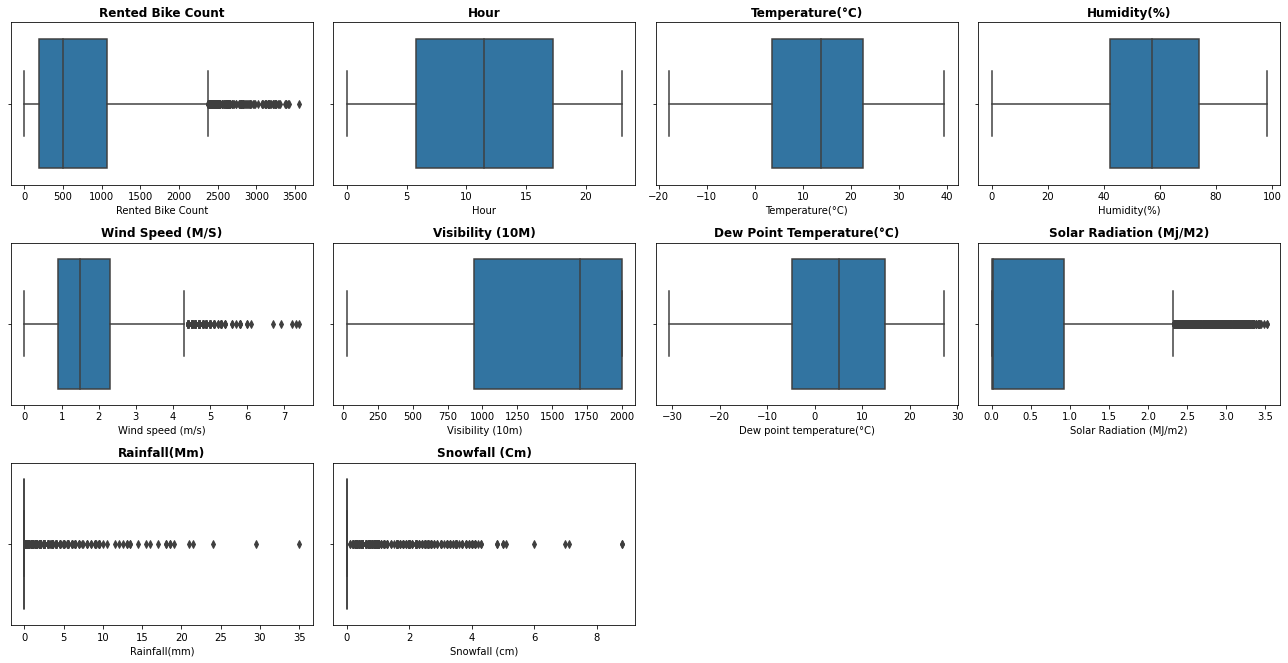

In [285]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,15))
for n,column in enumerate(df.describe().columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [286]:
# We can see outliers on the upper side of the following columns
target = ['Wind speed (m/s)','Solar Radiation (MJ/m2)']

In [287]:
new_df = df.copy()
# Removing outliers by standard methods:
for col in target:
  # Using IQR method to define the range of inliners:
  q1, q3, median = new_df[col].quantile([0.25,0.75,0.5])
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers from the upper side with median value.
  new_df[col] = np.where(new_df[col] > upper_limit, median,new_df[col])

In [288]:
# df['Wind speed (m/s)'].value_counts()

In [289]:
# new_df['Wind speed (m/s)'].value_counts()

##**Cleaning and Manipulating dataset**

In [290]:
#checking duplicates
len(new_df[new_df.duplicated()])

0

In [291]:
new_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [292]:
#extracting date from date column
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df['year']=pd.DatetimeIndex(new_df['Date']).year
new_df['month']=pd.DatetimeIndex(new_df['Date']).month
new_df['day']=pd.DatetimeIndex(new_df['Date']).day

new_df['month_name']=new_df['Date'].dt.month_name()
new_df['day_name']=new_df['Date'].dt.day_name()

new_df.drop(['Date'],axis=1,inplace=True)



In [293]:
new_df['day_or_night']=new_df['Hour'].apply(lambda x: 'day' if (20 > x >5) else 'night')


In [294]:
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,month_name,day_name,day_or_night
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,January,Thursday,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,January,Thursday,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,January,Thursday,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,January,Thursday,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,January,Thursday,night


In [295]:
new_df.drop(['month','day'],axis=1,inplace=True)

# **EDA**

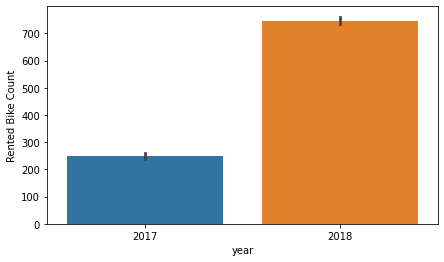

In [296]:
#checking year wise demand
plt.figure(figsize=(7,4))
sns.barplot(x=new_df['year'],y=new_df['Rented Bike Count'])

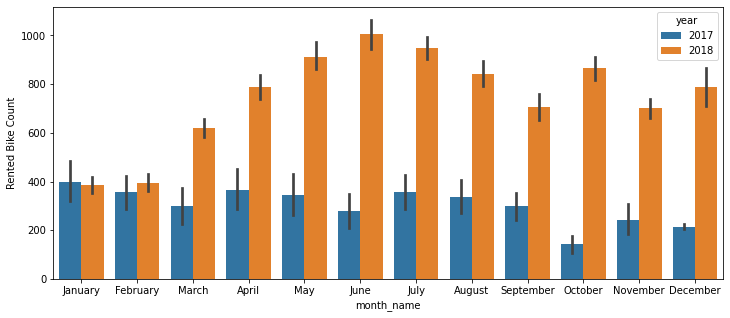

In [297]:
# checking month wise demand
plt.figure(figsize=(12,5))
sns.barplot(x=new_df['month_name'],y=new_df['Rented Bike Count'],hue='year',data=new_df)


In [298]:
new_df['day_or_night'].value_counts()

day      5110
night    3650
Name: day_or_night, dtype: int64

In [299]:
new_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

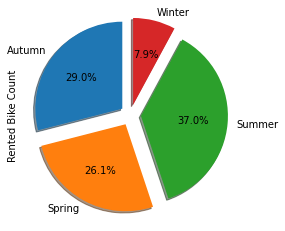

In [300]:
#checking bike counts on basis of season
explode = (0.12,0.12,0.12,0.12)
new_df.groupby(['Seasons'])['Rented Bike Count'].sum().plot.pie( explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

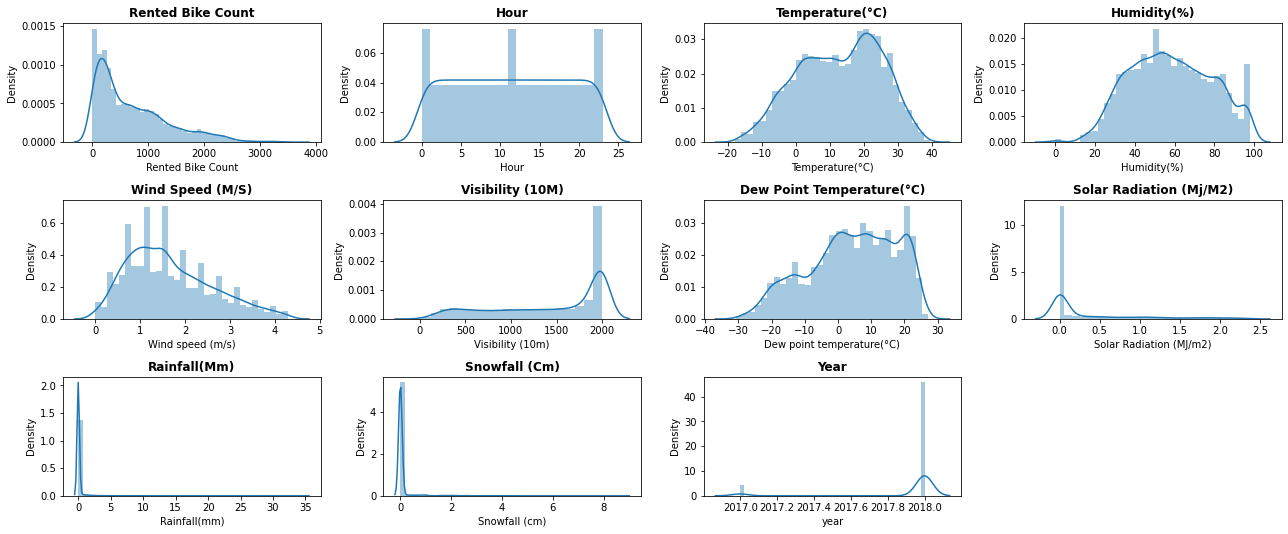

In [301]:
# Plotting the distplots for each  variable
plt.figure(figsize=(18,12))
for n,column in enumerate(new_df.describe().columns):
  plt.subplot(5,4,n+1)
  sns.distplot(new_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

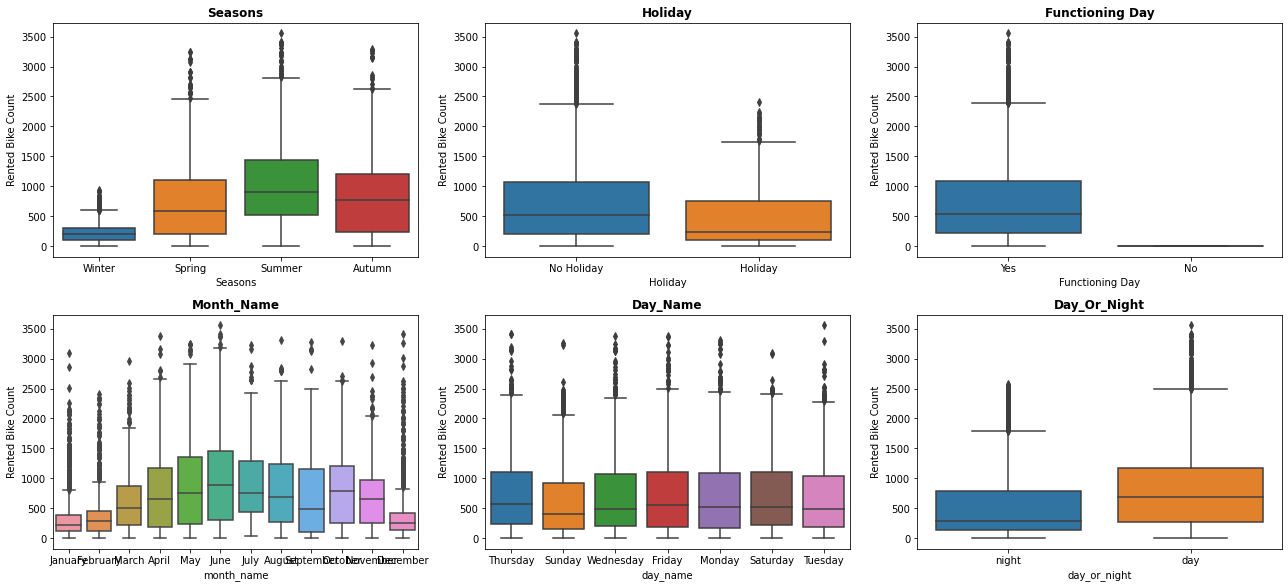

In [302]:
#checking categorical variables
categorical_features = [i for i in new_df.columns if i not in new_df.describe().columns]

plt.figure(figsize=(18,20))
for n,column in enumerate(categorical_features):
  plt.subplot(5,3,n+1)
  sns.boxplot(x=new_df[column] , y=new_df['Rented Bike Count'])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()




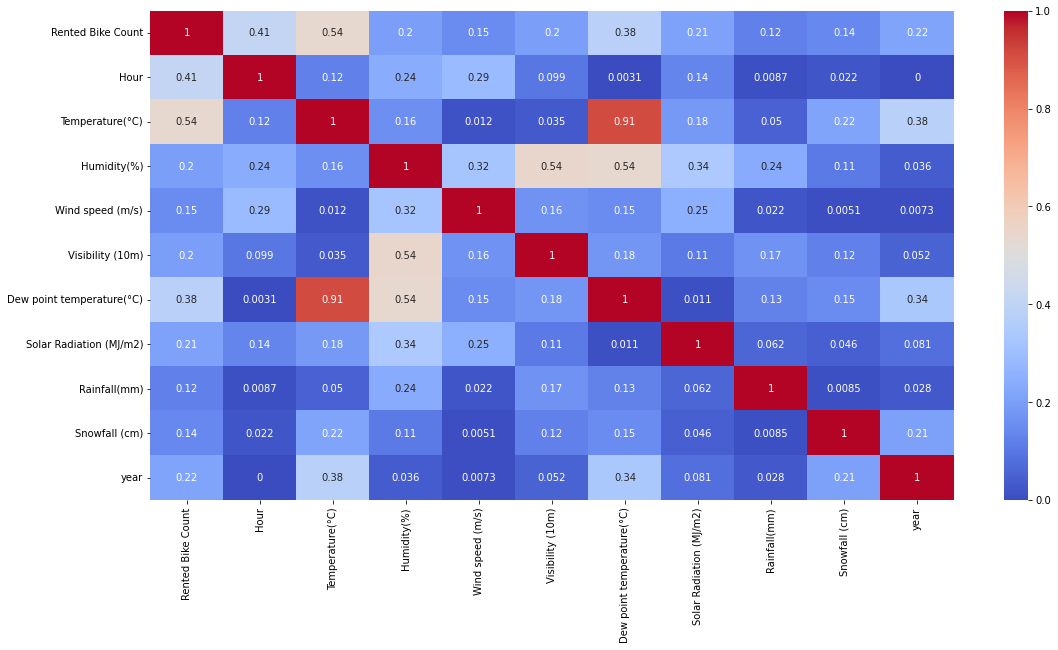

In [303]:
#checking corelations
plt.figure(figsize=(18,9))
sns.heatmap(abs(new_df.corr()), annot=True, cmap='coolwarm')

In [304]:
#to drop the Dew point temperature(°C) column
new_df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)


In [305]:
corr_df=new_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'].reset_index()
corr_df.columns=['varibles','correlation']
corr_df

,varibles,correlation
0,Rented Bike Count,1.000000
1,Temperature(°C),0.538558
2,Hour,0.410257
3,year,0.215162
4,Solar Radiation (MJ/m2),0.209449
5,Visibility (10m),0.199280
6,Wind speed (m/s),0.150898
7,Rainfall(mm),-0.123074
8,Snowfall (cm),-0.141804
9,Humidity(%),-0.199780


# **Model prepration**

In [306]:

# Label Encoding
new_df = new_df.replace({'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},'day_or_night':{'day':1, 'night': 0}})

# One Hot Encoding

new_df = pd.get_dummies(new_df, columns=['Seasons','month_name','day_name'], prefix='', prefix_sep='')
# dep_1=pd.get_dummies(bike_df['Seasons'], drop_first=True)


In [307]:
new_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,day_or_night,Autumn,Spring,Summer,Winter,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,2017,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,2018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [308]:
#
dependend_variable = 'Rented Bike Count'
#list of features
independend_variable = list(set(new_df.describe(include='all').columns.tolist()) - {dependend_variable})
independend_variable

['Wind speed (m/s)',
 'day_or_night',
 'Hour',
 'April',
 'May',
 'Snowfall (cm)',
 'Autumn',
 'September',
 'Humidity(%)',
 'Spring',
 'January',
 'Friday',
 'Sunday',
 'Temperature(°C)',
 'Functioning Day',
 'March',
 'Solar Radiation (MJ/m2)',
 'Saturday',
 'Summer',
 'June',
 'Thursday',
 'Monday',
 'November',
 'Rainfall(mm)',
 'February',
 'July',
 'Winter',
 'Holiday',
 'Tuesday',
 'Wednesday',
 'October',
 'Visibility (10m)',
 'December',
 'August',
 'year']

In [309]:
#checking skewness of the dependend variable
print(f'skewness of original data :{new_df[dependend_variable].skew()}')
l_og= np.log(new_df['Rented Bike Count']).skew()
print(f'skewness after applying log transformation : { l_og}')
sq_rt=np.sqrt(df['Rented Bike Count']).skew()
print(f'skewness after applying sqrt transformation : {sq_rt}')
print('_ * _ *'*10)
print("since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it")

skewness of original data :1.1534281773679014
skewness after applying log transformation : nan
skewness after applying sqrt transformation : 0.237362090985412
_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *
since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it


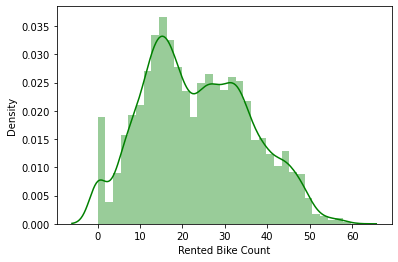

In [310]:
#plot for distribution of dependend variable after applying the sqrt transformation
sns.distplot(np.sqrt(df['Rented Bike Count']),color= 'g')

In [311]:
#create the data of independent variables 
x = new_df[independend_variable].values

In [312]:
#create the data of independent variables 
y = np.sqrt(new_df[dependend_variable].values)

In [313]:
#spliting dataset into training and test set
# x_train,x_test,y_train,y_test = train_test_split(x'y,train_size = 0.7, test_size = 0.3,random_state=42)
training_df,testing_df = train_test_split(new_df,train_size = 0.7, test_size = 0.3,random_state=42)

In [314]:
training_df.size

220752

In [315]:
training_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,day_or_night,Autumn,Spring,Summer,Winter,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1444,33,4,-11.1,50,1.2,1986,0.00,0.0,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1652,218,20,-5.8,44,2.1,1994,0.00,0.0,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7496,0,8,11.4,66,0.8,1991,0.18,0.0,0.0,1,0,2018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1893,133,21,-2.3,38,2.3,2000,0.00,0.0,0.0,1,1,2018,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3880,1496,16,19.1,54,3.2,542,0.94,0.0,0.0,0,1,2018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1507,22,29.9,74,2.0,1201,0.00,0.0,0.0,0,1,2018,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5191,828,7,23.5,90,0.5,445,0.05,0.5,0.0,0,1,2018,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5390,999,14,29.5,62,2.7,1941,1.79,0.0,0.0,0,1,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
860,322,20,-3.4,51,1.1,1391,0.00,0.0,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [316]:
testing_df.size

94608

In [317]:
#transforming the dataset
from sklearn.preprocessing import StandardScaler
col_to_scale=['Wind speed (m/s)','Hour','Snowfall (cm)','Humidity(%)','Temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Visibility (10m)','Rented Bike Count']
# scaler=StandardScaler()
# training_df[col_to_scale] =scaler.fit_transform(training_df[col_to_scale])
# testing_df[col_to_scale]=scaler.transform(testing_df[col_to_scale])

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
training_df[col_to_scale] =scaler.fit_transform(training_df[col_to_scale])
testing_df[col_to_scale]=scaler.transform(testing_df[col_to_scale])

# y_train=scaler.fit_transform(x_train)
# y_test=scaler.transform(x_test)

In [318]:
training_df['Rented Bike Count'] = np.sqrt(training_df[dependend_variable])
testing_df['Rented Bike Count'] = np.sqrt(testing_df[dependend_variable])

x_train = training_df.drop(['Rented Bike Count'],axis=1)
y_train = training_df['Rented Bike Count']
x_test = testing_df.drop(['Rented Bike Count'],axis=1)
y_test = testing_df['Rented Bike Count']
training_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,day_or_night,Autumn,Spring,Summer,Winter,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1444,0.098259,0.173913,0.113274,0.510204,0.279070,0.992883,0.000000,0.000000,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1652,0.252547,0.869565,0.207080,0.448980,0.488372,0.996950,0.000000,0.000000,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7496,0.000000,0.347826,0.511504,0.673469,0.186047,0.995425,0.077586,0.000000,0.0,1,0,2018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1893,0.197260,0.913043,0.269027,0.387755,0.534884,1.000000,0.000000,0.000000,0.0,1,1,2018,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3880,0.661576,0.695652,0.647788,0.551020,0.744186,0.258770,0.405172,0.000000,0.0,0,1,2018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.664004,0.956522,0.838938,0.755102,0.465116,0.593798,0.000000,0.000000,0.0,0,1,2018,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5191,0.492186,0.304348,0.725664,0.918367,0.116279,0.209456,0.021552,0.020833,0.0,0,1,2018,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5390,0.540626,0.608696,0.831858,0.632653,0.627907,0.970005,0.771552,0.000000,0.0,0,1,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
860,0.306932,0.869565,0.249558,0.520408,0.255814,0.690391,0.000000,0.000000,0.0,0,1,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [319]:
# fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [320]:
# y  intercept
regressor.intercept_

-1748742774173.2551

In [321]:
#to see coefficiet of b1,b2,b3...
regressor.coef_

array([ 1.98182222e-01,  4.19722308e-01, -2.00442475e-01,  3.27651591e-03,
        3.13758775e-02, -1.65073187e-02, -7.98846399e-01, -4.30859202e-02,
       -4.95584516e-02,  4.90796210e-01, -3.48582895e-02,  3.75543094e-02,
        3.41702235e+12,  3.41702235e+12,  3.41702235e+12,  3.41702235e+12,
        2.10374172e+12,  2.10374172e+12,  2.10374172e+12,  2.10374172e+12,
        2.10374172e+12,  2.10374172e+12,  2.10374172e+12,  2.10374172e+12,
        2.10374172e+12,  2.10374172e+12,  2.10374172e+12,  2.10374172e+12,
       -3.77202130e+12, -3.77202130e+12, -3.77202130e+12, -3.77202130e+12,
       -3.77202130e+12, -3.77202130e+12, -3.77202130e+12])

In [322]:
#prediction on train data
y_train_pred = regressor.predict(x_train)

In [323]:
#prediction on test data
y_pred =regressor.predict(x_test)

In [324]:
from sklearn.metrics import mean_squared_error
#MSE
mean_squared_error(y_test,y_pred)

0.015602157212558454

In [325]:
from sklearn.metrics import r2_score
#train perfomance
print(r2_score(y_train,y_train_pred))
#test perfomance
r2_score(y_test,y_pred)

0.6759682410989997


0.6489782238108314